# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key and set units
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set base url to make requests
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city list and count to confirm sufficient count and proper syntax
len(cities)

623

### Perform API Calls

In [3]:
#Creating all of the lists which will be appeneded in the following for loop
cityName = []
cloudiness = []
date = []
humidity = []
lats = []
lngs = []
maxTemp = []
windSpeed = []
country = []

#Creating 2 counter variables to keep track of the number in each set being printed
counter = 0
set_counter = 1

# Print statement header 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#for loop with try and except statement to prevent the compile from erroring and stopping due to lacking info on a city
for city in cities:
    try:
        #Requesting info from the url and appending all of our lists with this info
        response = requests.get(url + city.replace(" ","&")).json()
        cityName.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        #logic to count through the sets and numbers in each set, resetting at 50 in each set
        if counter > 49:
            counter = 1
            set_counter += 1
        else:
            counter += 1
            
        print(f"Processing Record {counter} of Set {set_counter} | {city}")

    #If there is an error due to missing info, print this statement
    except: 
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | nara
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | matara
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | comodoro rivadavia
Processing Record 15 of Set 1 | jinchang
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | kathmandu
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | shestakovo
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | pelym
Processing Re

Processing Record 34 of Set 4 | prigorodka
Processing Record 35 of Set 4 | roseburg
Processing Record 36 of Set 4 | chabahar
Processing Record 37 of Set 4 | adelaide
Processing Record 38 of Set 4 | caraballeda
Processing Record 39 of Set 4 | lufilufi
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | carnarvon
City not found. Skipping...
Processing Record 42 of Set 4 | roald
Processing Record 43 of Set 4 | kaitangata
City not found. Skipping...
Processing Record 44 of Set 4 | clovis
Processing Record 45 of Set 4 | geraldton
Processing Record 46 of Set 4 | mayumba
Processing Record 47 of Set 4 | nurota
Processing Record 48 of Set 4 | sawtell
Processing Record 49 of Set 4 | chara
Processing Record 50 of Set 4 | yantongshan
Processing Record 1 of Set 5 | chengzihe
Processing Record 2 of Set 5 | hearst
Processing Record 3 of Set 5 | ambilobe
City not found. Skipping...
Processing Record 4 of Set 5 | mouila
Processing Record 5 of Set 5 | kidal
Processing Record 6 of

Processing Record 18 of Set 8 | oudtshoorn
Processing Record 19 of Set 8 | ankazobe
Processing Record 20 of Set 8 | bon accord
Processing Record 21 of Set 8 | kintampo
Processing Record 22 of Set 8 | brodick
Processing Record 23 of Set 8 | rudnogorsk
Processing Record 24 of Set 8 | bandarbeyla
Processing Record 25 of Set 8 | vila franca do campo
Processing Record 26 of Set 8 | kirkwall
Processing Record 27 of Set 8 | bud
Processing Record 28 of Set 8 | northam
Processing Record 29 of Set 8 | mehran
Processing Record 30 of Set 8 | dongargaon
Processing Record 31 of Set 8 | panaba
Processing Record 32 of Set 8 | ust-tsilma
City not found. Skipping...
Processing Record 33 of Set 8 | tahoua
City not found. Skipping...
Processing Record 34 of Set 8 | shaoxing
City not found. Skipping...
Processing Record 35 of Set 8 | ongandjera
Processing Record 36 of Set 8 | ilinskiy
Processing Record 37 of Set 8 | prabumulih
Processing Record 38 of Set 8 | uni
Processing Record 39 of Set 8 | visby
Proces

Processing Record 47 of Set 11 | tessalit
Processing Record 48 of Set 11 | stokmarknes
------------------------------
Data Retrieval Complete
------------------------------


In [4]:
#Creating the list of dictionaries which will be converted into a dataframe
weather_dict = {
    "City": cityName,
    "Cloudiness": cloudiness ,
    "Country": country ,
    "Date": date,
    "Humidity": humidity ,
    "Lat.": lats,
    "Lng.": lngs, 
    "Max Temp": maxTemp ,
    "Wind Speed": windSpeed
}

#Creating the dataframe 
weather_df = pd.DataFrame(weather_dict)

#Showing the count of all values in the dataframe
weather_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat.          548
Lng.          548
Max Temp      548
Wind Speed    548
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,Nara,75,JP,1579765209,93,34.69,135.80,53.60,1.12
1,Hasaki,75,JP,1579764974,100,35.73,140.83,43.00,11.41
2,Sitka,90,US,1579764966,65,57.05,-135.33,44.60,8.05
3,Atuona,0,PF,1579764918,75,-9.80,-139.03,80.56,10.40
4,Matara,98,LK,1579764980,57,5.95,80.54,90.39,12.73


### Plotting the Data

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

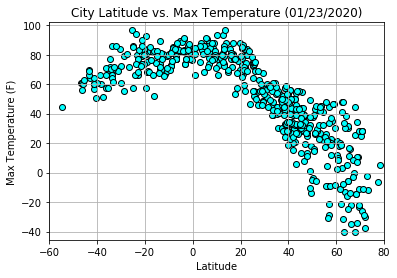

In [6]:
plt.scatter(lats, maxTemp, edgecolors="black", facecolors="aqua")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, min(maxTemp)-5, max(maxTemp)+5])
plt.savefig("Figures/City_Latitude_vs._Max_Temperature.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

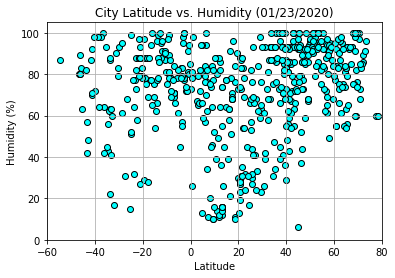

In [7]:
plt.scatter(lats, humidity, edgecolors="black", facecolors="aqua")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, 0, max(humidity)+5])
plt.savefig("Figures/City_Latitude_vs._Humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

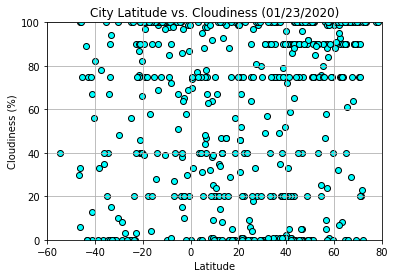

In [8]:
plt.scatter(lats, cloudiness, edgecolors="black", facecolors="aqua")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, 0, 100])
plt.savefig("Figures/City_Latitude_vs._Cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

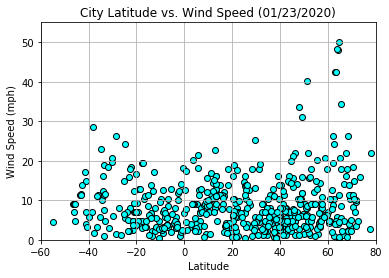

In [9]:
plt.scatter(lats, windSpeed, edgecolors="black", facecolors="aqua")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, 0, max(windSpeed)+5])
plt.savefig("Figures/City_Latitude_vs._Wind_Speed.png")
plt.show

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
#northern hemispehere lat < 0 ; southern < 0

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression